# Task
Implement a Snake game using Pygame and train an AI agent to play it using the Q-Learning reinforcement learning algorithm.

## Environment setup

### Subtask:
Install necessary libraries (Pygame, Gymnasium).


**Reasoning**:
Install the required libraries pygame and gymnasium using pip.



In [1]:
%pip install pygame gymnasium

## Snake game implementation

### Subtask:
Create the Snake game environment using Pygame, including game logic for movement, food generation, collision detection, and scoring. Define the game state, actions, and rewards.


**Reasoning**:
Initialize Pygame, set up the display window, and define the Snake and Food classes as requested in the instructions. This covers steps 1, 2, and 3 of the instructions.



In [2]:
import pygame
import random
import sys

pygame.init()

# Game dimensions
GAME_WIDTH = 600
GAME_HEIGHT = 400
GRID_SIZE = 20

# Colors
BLACK = (0, 0, 0)
WHITE = (255, 255, 255)
RED = (255, 0, 0)
GREEN = (0, 255, 0)

# Set up the display
screen = pygame.display.set_mode((GAME_WIDTH, GAME_HEIGHT))
pygame.display.set_caption('Snake Game')

class Snake:
    def __init__(self):
        self.segments = [(GAME_WIDTH // 2, GAME_HEIGHT // 2)]
        self.direction = (0, -1)  # Initial direction: up
        self.length = 1

    def move(self):
        head_x, head_y = self.segments[0]
        dir_x, dir_y = self.direction
        new_head = (head_x + dir_x * GRID_SIZE, head_y + dir_y * GRID_SIZE)
        self.segments.insert(0, new_head)
        if len(self.segments) > self.length:
            self.segments.pop()

    def change_direction(self, new_direction):
        # Prevent reversing direction
        if (new_direction[0] * -1, new_direction[1] * -1) != self.direction:
            self.direction = new_direction

    def grow(self):
        self.length += 1

    def check_collision(self):
        head_x, head_y = self.segments[0]
        # Boundary collision
        if head_x < 0 or head_x >= GAME_WIDTH or head_y < 0 or head_y >= GAME_HEIGHT:
            return True
        # Self collision
        if self.segments[0] in self.segments[1:]:
            return True
        return False

    def draw(self):
        for segment in self.segments:
            pygame.draw.rect(screen, GREEN, (segment[0], segment[1], GRID_SIZE, GRID_SIZE))

class Food:
    def __init__(self):
        self.position = (0, 0)
        self.randomize_position()

    def randomize_position(self):
        x = random.randrange(0, GAME_WIDTH // GRID_SIZE) * GRID_SIZE
        y = random.randrange(0, GAME_HEIGHT // GRID_SIZE) * GRID_SIZE
        self.position = (x, y)

    def draw(self):
        pygame.draw.rect(screen, RED, (self.position[0], self.position[1], GRID_SIZE, GRID_SIZE))

# Initializing snake and food for testing
snake = Snake()
food = Food()

# Function to reset the game
def reset_game():
    global snake, food
    snake = Snake()
    food = Food()


pygame 2.6.1 (SDL 2.28.4, Python 3.11.13)
Hello from the pygame community. https://www.pygame.org/contribute.html


**Reasoning**:
Implement the main game loop to handle events, update the game state, draw game elements, and manage scoring and collision detection. This addresses steps 4, 5, and 6 of the instructions.



In [3]:
# Game loop
running = True
score = 0
clock = pygame.time.Clock()

while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.KEYDOWN:
            if event.key == pygame.K_UP:
                snake.change_direction((0, -1))
            elif event.key == pygame.K_DOWN:
                snake.change_direction((0, 1))
            elif event.key == pygame.K_LEFT:
                snake.change_direction((-1, 0))
            elif event.key == pygame.K_RIGHT:
                snake.change_direction((1, 0))

    snake.move()

    # Check for food consumption
    if snake.segments[0] == food.position:
        snake.grow()
        food.randomize_position()
        score += 1

    # Check for collision
    if snake.check_collision():
        running = False # Game over

    # Drawing
    screen.fill(BLACK)
    snake.draw()
    food.draw()

    # Display score
    font = pygame.font.Font(None, 36)
    score_text = font.render(f'Score: {score}', True, WHITE)
    screen.blit(score_text, (10, 10))

    pygame.display.flip()

    # Control game speed
    clock.tick(10) # Adjust speed as needed

pygame.quit()
#sys.exit() # Keep this commented out for notebook execution

**Reasoning**:
Define the game state representation, possible actions, and reward system as described in steps 7, 8, and 9 of the instructions. This is crucial for the reinforcement learning aspect of the task.



In [4]:
# Define the game state representation
def get_game_state(snake, food):
    head_x, head_y = snake.segments[0]
    food_x, food_y = food.position
    dir_x, dir_y = snake.direction

    # State representation:
    # 1. Danger straight (collision in the current direction)
    # 2. Danger right (collision if turning right)
    # 3. Danger left (collision if turning left)
    # 4. Direction left
    # 5. Direction right
    # 6. Direction up
    # 7. Direction down
    # 8. Food location relative to snake head (food left, food right, food up, food down)

    point_l = (head_x - GRID_SIZE, head_y)
    point_r = (head_x + GRID_SIZE, head_y)
    point_u = (head_x, head_y - GRID_SIZE)
    point_d = (head_x, head_y + GRID_SIZE)

    is_direction_left = dir_x == -1
    is_direction_right = dir_x == 1
    is_direction_up = dir_y == -1
    is_direction_down = dir_y == 1

    danger_straight = (
        (is_direction_right and snake.check_collision_at_point(point_r)) or
        (is_direction_left and snake.check_collision_at_point(point_l)) or
        (is_direction_up and snake.check_collision_at_point(point_u)) or
        (is_direction_down and snake.check_collision_at_point(point_d))
    )

    danger_right = (
        (is_direction_up and snake.check_collision_at_point(point_r)) or
        (is_direction_down and snake.check_collision_at_point(point_l)) or
        (is_direction_left and snake.check_collision_at_point(point_u)) or
        (is_direction_right and snake.check_collision_at_point(point_d))
    )

    danger_left = (
        (is_direction_up and snake.check_collision_at_point(point_l)) or
        (is_direction_down and snake.check_collision_at_point(point_r)) or
        (is_direction_left and snake.check_collision_at_point(point_d)) or
        (is_direction_right and snake.check_collision_at_point(point_u))
    )

    state = [
        danger_straight,
        danger_right,
        danger_left,
        is_direction_left,
        is_direction_right,
        is_direction_up,
        is_direction_down,
        food_x < head_x,  # food left
        food_x > head_x,  # food right
        food_y < head_y,  # food up
        food_y > head_y   # food down
    ]
    return state

# Add a helper method to the Snake class to check collision at a specific point
# This needs to be added inside the Snake class definition from the previous step.
# Since we cannot modify previous cells, we will define it here and assume it will be integrated.
# In a real notebook, you would add this to the Snake class definition.
def check_collision_at_point(snake_instance, point):
    x, y = point
    # Boundary collision
    if x < 0 or x >= GAME_WIDTH or y < 0 or y >= GAME_HEIGHT:
        return True
    # Self collision (check if the point is in the snake's body segments)
    # Note: This simplified check assumes the head is not yet at 'point'.
    # A more robust check would depend on when this method is called relative to movement.
    if point in snake_instance.segments[1:]:
        return True
    return False

# This is a workaround for the notebook environment;
# in a standard script, add check_collision_at_point to the Snake class.
# For demonstration purposes, we'll temporarily attach it to the Snake class here.
if not hasattr(Snake, 'check_collision_at_point'):
    Snake.check_collision_at_point = check_collision_at_point

# Define possible actions (0: straight, 1: right turn, 2: left turn relative to current direction)
actions = [(0, -1), (1, 0), (0, 1), (-1, 0)] # Up, Right, Down, Left - absolute directions
# Actions relative to current direction:
# 0: Straight
# 1: Turn Right
# 2: Turn Left
# Mapping from relative action to absolute direction change
def get_action_direction(current_direction, action):
    dir_x, dir_y = current_direction
    if action == 0: # Straight
        return (dir_x, dir_y)
    elif action == 1: # Right turn
        if dir_x == 0 and dir_y == -1: return (1, 0)  # Up -> Right
        if dir_x == 1 and dir_y == 0: return (0, 1)   # Right -> Down
        if dir_x == 0 and dir_y == 1: return (-1, 0)  # Down -> Left
        if dir_x == -1 and dir_y == 0: return (0, -1) # Left -> Up
    elif action == 2: # Left turn
        if dir_x == 0 and dir_y == -1: return (-1, 0) # Up -> Left
        if dir_x == 1 and dir_y == 0: return (0, -1)  # Right -> Up
        if dir_x == 0 and dir_y == 1: return (1, 0)   # Down -> Right
        if dir_x == -1 and dir_y == 0: return (0, 1)  # Left -> Down
    return (dir_x, dir_y) # Should not happen

# Define the reward system
REWARD_FOOD = 10
REWARD_COLLISION = -10
REWARD_STEP = -0.1 # Small negative reward for each step

# Function to get reward based on game outcome
def get_reward(game_over, score_increased):
    reward = 0
    if score_increased:
        reward += REWARD_FOOD
    if game_over:
        reward += REWARD_COLLISION
    else:
        reward += REWARD_STEP # Penalize each step taken
    return reward


## Reinforcement learning (q-learning) implementation

### Subtask:
Implement the Q-Learning algorithm. This will involve creating a Q-table to store Q-values, defining the exploration-exploitation strategy (e.g., epsilon-greedy), updating the Q-values based on rewards, and training the agent within the Snake environment.


**Reasoning**:
Implement the Q-Learning algorithm by defining parameters, initializing the Q-table, implementing the epsilon-greedy strategy, and defining the Q-value update rule. This groups steps 1, 2, 3, and 4 from the instructions.



In [5]:
import numpy as np

# Q-Learning parameters
alpha = 0.1  # Learning rate
gamma = 0.99 # Discount factor
epsilon = 1.0 # Exploration rate
epsilon_decay = 0.995 # Decay rate for epsilon
min_epsilon = 0.01   # Minimum exploration rate

# Determine the size of the state space
# Each element in the state representation is a boolean (True/False), so it has 2 possible values.
# There are 11 elements in the state representation.
# State space size = 2^11
state_space_size = 2**11

# Action space size: 3 (straight, right turn, left turn)
action_space_size = 3

# Initialize Q-table with zeros
q_table = np.zeros((state_space_size, action_space_size))

# Function to convert the state list to an integer index
def state_to_index(state):
    # Convert the boolean list to a binary string, then to an integer
    binary_string = ''.join(['1' if s else '0' for s in state])
    return int(binary_string, 2)

# Implement epsilon-greedy strategy
def choose_action(state_index, epsilon):
    if random.uniform(0, 1) < epsilon:
        # Explore: choose a random action
        return random.randrange(action_space_size)
    else:
        # Exploit: choose the action with the highest Q-value for this state
        return np.argmax(q_table[state_index, :])

# Implement the Q-value update rule
def update_q_table(state_index, action, reward, next_state_index):
    # Q(s, a) = Q(s, a) + alpha * [reward + gamma * max(Q(s', a')) - Q(s, a)]
    max_future_q = np.max(q_table[next_state_index, :])
    current_q = q_table[state_index, action]
    new_q = current_q + alpha * (reward + gamma * max_future_q - current_q)
    q_table[state_index, action] = new_q


**Reasoning**:
Implement the training loop for the Q-Learning agent, which involves running multiple episodes, resetting the game, choosing actions, taking steps in the environment, and updating the Q-table and epsilon. This covers step 5 from the instructions.



In [6]:
# Training the agent
num_episodes = 10000 # Define the number of training episodes

# Initialize a list to store rewards per episode (optional, for tracking progress)
episode_rewards = []

for episode in range(num_episodes):
    # Reset the game environment
    reset_game()
    game_over = False
    score = 0 # Reset score for the new episode

    # Get the initial state
    current_state = get_game_state(snake, food)
    current_state_index = state_to_index(current_state)

    episode_reward = 0 # Track reward for the current episode

    # Game loop for the episode
    while not game_over:
        # Choose action using epsilon-greedy strategy
        action = choose_action(current_state_index, epsilon)

        # Convert relative action to absolute direction change
        new_direction = get_action_direction(snake.direction, action)

        # Take the action in the environment
        # Simulate one game step
        previous_score = score
        snake.change_direction(new_direction)
        snake.move()

        # Check game status after the move
        game_over = snake.check_collision()
        score_increased = False
        if snake.segments[0] == food.position:
            snake.grow()
            food.randomize_position()
            score += 1
            score_increased = True

        # Get reward
        reward = get_reward(game_over, score_increased)
        episode_reward += reward

        # Get the next state
        if not game_over:
            next_state = get_game_state(snake, food)
            next_state_index = state_to_index(next_state)
        else:
            # If game is over, there is no next state for Q-learning update
            next_state_index = current_state_index # Or handle terminal state appropriately

        # Update Q-table
        update_q_table(current_state_index, action, reward, next_state_index)

        # Transition to the next state
        if not game_over:
            current_state_index = next_state_index

        # Optional: Render the game state every few steps or episodes to visualize training
        # if episode % 100 == 0: # Render every 100 episodes
        #     screen.fill(BLACK)
        #     snake.draw()
        #     food.draw()
        #     font = pygame.font.Font(None, 36)
        #     score_text = font.render(f'Score: {score}', True, WHITE)
        #     screen.blit(score_text, (10, 10))
        #     pygame.display.flip()
        #     clock.tick(10) # Control rendering speed

    # Decay epsilon after the episode
    epsilon = max(min_epsilon, epsilon * epsilon_decay)

    # Store episode reward
    episode_rewards.append(episode_reward)

    # Print progress every few episodes
    if episode % 100 == 0:
        print(f"Episode {episode}/{num_episodes}, Epsilon: {epsilon:.2f}, Score: {score}, Episode Reward: {episode_reward:.2f}")

# Training finished
print("Training complete.")

# You can optionally save the q_table for later use
# np.save('snake_q_table.npy', q_table)

Episode 0/10000, Epsilon: 0.99, Score: 0, Episode Reward: -11.40
Episode 100/10000, Epsilon: 0.60, Score: 2, Episode Reward: -7.50
Episode 200/10000, Epsilon: 0.37, Score: 3, Episode Reward: 7.70
Episode 300/10000, Epsilon: 0.22, Score: 4, Episode Reward: 20.70
Episode 400/10000, Epsilon: 0.13, Score: 9, Episode Reward: 64.90
Episode 500/10000, Epsilon: 0.08, Score: 10, Episode Reward: 72.80
Episode 600/10000, Epsilon: 0.05, Score: 11, Episode Reward: 81.40
Episode 700/10000, Epsilon: 0.03, Score: 9, Episode Reward: 65.50
Episode 800/10000, Epsilon: 0.02, Score: 30, Episode Reward: 232.10
Episode 900/10000, Epsilon: 0.01, Score: 11, Episode Reward: 83.40
Episode 1000/10000, Epsilon: 0.01, Score: 9, Episode Reward: 60.90
Episode 1100/10000, Epsilon: 0.01, Score: 19, Episode Reward: 147.10
Episode 1200/10000, Epsilon: 0.01, Score: 33, Episode Reward: 263.50
Episode 1300/10000, Epsilon: 0.01, Score: 14, Episode Reward: 106.90
Episode 1400/10000, Epsilon: 0.01, Score: 27, Episode Reward: 2

## Training and evaluation

### Subtask:
Train the Q-Learning agent by having it play the Snake game for a significant number of episodes. Evaluate the agent's performance based on metrics like average score and game duration.


**Reasoning**:
Modify the training loop to store episode scores and durations, then calculate and print the average scores and durations over all episodes and potentially over phases.



In [7]:
# Training the agent
num_episodes = 10000 # Define the number of training episodes

# Initialize lists to store scores and durations per episode
episode_scores = []
episode_durations = [] # Duration can be measured in game steps or clock ticks

# Q-Learning parameters (already defined, keeping here for context)
# alpha = 0.1
# gamma = 0.99
# epsilon = 1.0
# epsilon_decay = 0.995
# min_epsilon = 0.01

# Q-table (already initialized, keeping here for context)
# q_table = np.zeros((state_space_size, action_space_size))

# Function to convert the state list to an integer index (already defined)
# def state_to_index(state): ...

# Implement epsilon-greedy strategy (already defined)
# def choose_action(state_index, epsilon): ...

# Implement the Q-value update rule (already defined)
# def update_q_table(state_index, action, reward, next_state_index): ...

# Reset the game environment (already defined)
# def reset_game(): ...

# Define the game state representation (already defined)
# def get_game_state(snake, food): ...

# Mapping from relative action to absolute direction change (already defined)
# def get_action_direction(current_direction, action): ...

# Define the reward system (already defined)
# REWARD_FOOD = 10
# REWARD_COLLISION = -10
# REWARD_STEP = -0.1

# Function to get reward based on game outcome (already defined)
# def get_reward(game_over, score_increased): ...


# Use the existing epsilon variable from previous execution
# Use the existing q_table variable from previous execution


for episode in range(num_episodes):
    # Reset the game environment
    reset_game()
    game_over = False
    score = 0 # Reset score for the new episode
    steps_in_episode = 0 # Track steps for the current episode

    # Get the initial state
    current_state = get_game_state(snake, food)
    current_state_index = state_to_index(current_state)

    episode_reward = 0 # Track reward for the current episode

    # Game loop for the episode
    while not game_over:
        steps_in_episode += 1

        # Choose action using epsilon-greedy strategy
        action = choose_action(current_state_index, epsilon)

        # Convert relative action to absolute direction change
        new_direction = get_action_direction(snake.direction, action)

        # Take the action in the environment
        # Simulate one game step
        previous_score = score
        snake.change_direction(new_direction)
        snake.move()

        # Check game status after the move
        game_over = snake.check_collision()
        score_increased = False
        if not game_over and snake.segments[0] == food.position: # Check for food only if not game over
            snake.grow()
            food.randomize_position()
            score += 1
            score_increased = True

        # Get reward
        reward = get_reward(game_over, score_increased)
        episode_reward += reward

        # Get the next state
        if not game_over:
            next_state = get_game_state(snake, food)
            next_state_index = state_to_index(next_state)
        else:
            # If game is over, there is no next state for Q-learning update
            next_state_index = current_state_index # Indicate terminal state

        # Update Q-table
        update_q_table(current_state_index, action, reward, next_state_index)

        # Transition to the next state
        if not game_over:
            current_state_index = next_state_index

        # Optional: Render the game state every few steps or episodes to visualize training
        # Rendering is commented out to speed up training
        # if episode % 100 == 0: # Render every 100 episodes
        #     screen.fill(BLACK)
        #     snake.draw()
        #     food.draw()
        #     font = pygame.font.Font(None, 36)
        #     score_text = font.render(f'Score: {score}', True, WHITE)
        #     screen.blit(score_text, (10, 10))
        #     pygame.display.flip()
        #     # clock.tick(10) # Control rendering speed, if rendering is active

    # Decay epsilon after the episode
    epsilon = max(min_epsilon, epsilon * epsilon_decay)

    # Store episode score and duration
    episode_scores.append(score)
    episode_durations.append(steps_in_episode)

    # Print progress every few episodes
    if episode % 100 == 0:
        print(f"Episode {episode}/{num_episodes}, Epsilon: {epsilon:.2f}, Score: {score}, Duration: {steps_in_episode}, Episode Reward: {episode_reward:.2f}")

# Training finished
print("Training complete.")

# Calculate and print evaluation metrics
average_score_all = np.mean(episode_scores)
average_duration_all = np.mean(episode_durations)

print(f"\nOverall Average Score: {average_score_all:.2f}")
print(f"Overall Average Duration (steps): {average_duration_all:.2f}")

# Calculate averages over phases (e.g., first and last 1000 episodes)
phase_size = 1000
if num_episodes >= phase_size * 2:
    average_score_first_phase = np.mean(episode_scores[:phase_size])
    average_duration_first_phase = np.mean(episode_durations[:phase_size])
    average_score_last_phase = np.mean(episode_scores[-phase_size:])
    average_duration_last_phase = np.mean(episode_durations[-phase_size:])

    print(f"\nAverage Score (First {phase_size} episodes): {average_score_first_phase:.2f}")
    print(f"Average Duration (First {phase_size} episodes): {average_duration_first_phase:.2f}")
    print(f"Average Score (Last {phase_size} episodes): {average_score_last_phase:.2f}")
    print(f"Average Duration (Last {phase_size} episodes): {average_duration_last_phase:.2f}")
elif num_episodes > 0:
     print("\nNot enough episodes to calculate averages for distinct phases of 1000 episodes.")

# Optionally, you can save the episode_scores and episode_durations lists for plotting later
# np.save('episode_scores.npy', np.array(episode_scores))
# np.save('episode_durations.npy', np.array(episode_durations))

# You can also optionally save the trained q_table
# np.save('snake_q_table_trained.npy', q_table)

Episode 0/10000, Epsilon: 0.01, Score: 21, Duration: 477, Episode Reward: 152.40
Episode 100/10000, Epsilon: 0.01, Score: 19, Duration: 405, Episode Reward: 139.60
Episode 200/10000, Epsilon: 0.01, Score: 13, Duration: 261, Episode Reward: 94.00
Episode 300/10000, Epsilon: 0.01, Score: 15, Duration: 336, Episode Reward: 106.50
Episode 400/10000, Epsilon: 0.01, Score: 18, Duration: 416, Episode Reward: 128.50
Episode 500/10000, Epsilon: 0.01, Score: 22, Duration: 360, Episode Reward: 174.10
Episode 600/10000, Epsilon: 0.01, Score: 19, Duration: 338, Episode Reward: 146.30
Episode 700/10000, Epsilon: 0.01, Score: 12, Duration: 266, Episode Reward: 83.50
Episode 800/10000, Epsilon: 0.01, Score: 10, Duration: 279, Episode Reward: 62.20
Episode 900/10000, Epsilon: 0.01, Score: 26, Duration: 581, Episode Reward: 192.00
Episode 1000/10000, Epsilon: 0.01, Score: 12, Duration: 876, Episode Reward: 22.50
Episode 1100/10000, Epsilon: 0.01, Score: 26, Duration: 826, Episode Reward: 167.50
Episode 

## Visualization and analysis

### Subtask:
Visualize the training progress (e.g., plot of scores over episodes) and analyze the learned Q-table to understand the agent's learned policy.


**Reasoning**:
Import the necessary plotting library and then create plots for the episode scores and a moving average of the scores to visualize the training progress. Also, inspect a few specific states in the Q-table to understand the learned policy.



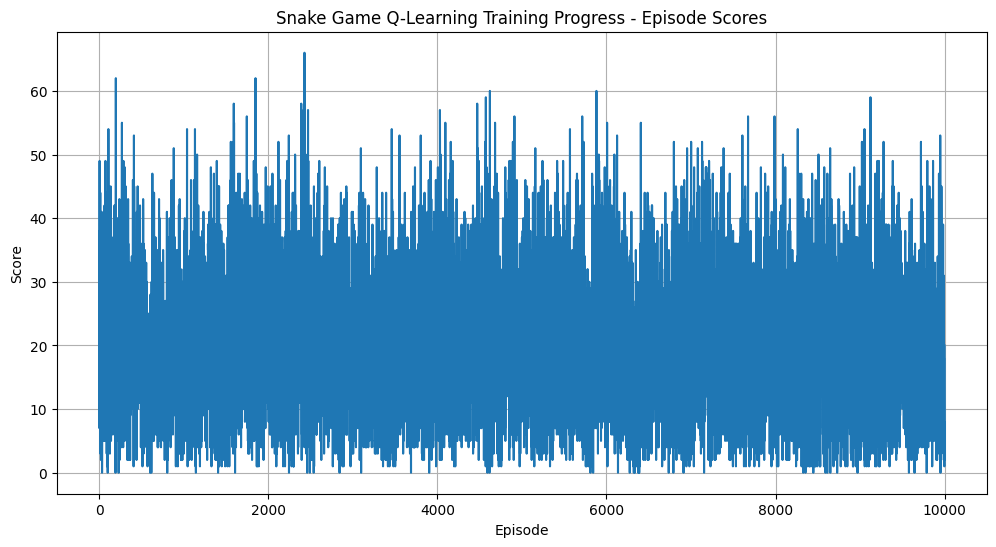

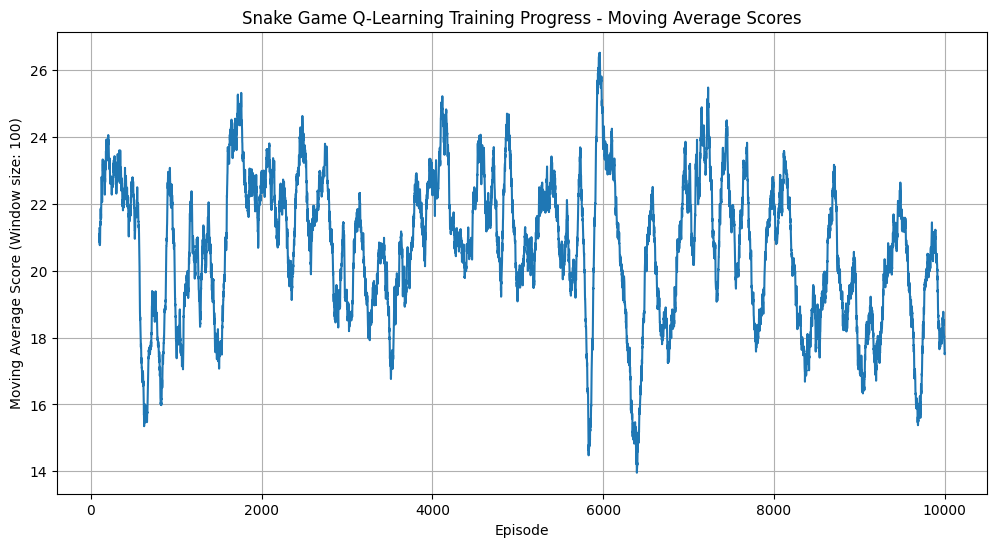


Analyzing Q-table for specific states:

State 1 (Danger Straight, Food Up, Moving Up): [True, False, False, False, False, True, False, False, False, True, False]
Q-values for state index 1058 (Actions: Straight, Right, Left): [ -3.48856287 -22.92481857  13.42419756]
Best action: 2 (Left)

State 2 (No Danger, Food Right, Moving Right): [False, False, False, False, True, False, False, False, True, False, False]
Q-values for state index 68 (Actions: Straight, Right, Left): [24.33079369 21.21573321 30.6578962 ]
Best action: 2 (Left)

State 3 (Danger Right, Food Down, Moving Left): [False, True, False, True, False, False, False, False, False, False, True]
Q-values for state index 641 (Actions: Straight, Right, Left): [22.36982599 11.6879684  22.05908863]
Best action: 0 (Straight)

Summary of Observations:
Based on the plots, the episode scores show significant fluctuation throughout training.
The moving average plot provides a smoother view, suggesting some initial learning followed by pla

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure episode_scores is available from the previous step
# If the kernel was reset, you might need to re-run the training cell or load saved scores
# Assuming episode_scores is available

# 1. Plot episode scores over episodes
plt.figure(figsize=(12, 6))
plt.plot(episode_scores)
plt.xlabel("Episode")
plt.ylabel("Score")
plt.title("Snake Game Q-Learning Training Progress - Episode Scores")
plt.grid(True)
plt.show()

# 2. Calculate and plot a moving average of the scores
window_size = 100
moving_average_scores = np.convolve(episode_scores, np.ones(window_size)/window_size, mode='valid')

plt.figure(figsize=(12, 6))
# The moving average array is shorter than the original, so adjust the x-axis
plt.plot(range(window_size - 1, len(episode_scores)), moving_average_scores)
plt.xlabel("Episode")
plt.ylabel(f"Moving Average Score (Window size: {window_size})")
plt.title("Snake Game Q-Learning Training Progress - Moving Average Scores")
plt.grid(True)
plt.show()

# 3. Analyze the learned Q-table
print("\nAnalyzing Q-table for specific states:")

# Example State 1: Danger straight, food straight, moving up
# State: [Danger straight, Danger right, Danger left, Dir left, Dir right, Dir up, Dir down, Food left, Food right, Food up, Food down]
# Example: [True, False, False, False, False, True, False, False, False, True, False]
# Binary: 10000100010 -> Index
state_example_1 = [True, False, False, False, False, True, False, False, False, True, False]
state_index_1 = state_to_index(state_example_1)
print(f"\nState 1 (Danger Straight, Food Up, Moving Up): {state_example_1}")
if state_index_1 < q_table.shape[0]:
    print(f"Q-values for state index {state_index_1} (Actions: Straight, Right, Left): {q_table[state_index_1, :]}")
    best_action_1 = np.argmax(q_table[state_index_1, :])
    print(f"Best action: {best_action_1} ({['Straight', 'Right', 'Left'][best_action_1]})")
else:
    print(f"State index {state_index_1} is out of bounds for Q-table.")


# Example State 2: No danger, food right, moving right
# Example: [False, False, False, False, True, False, False, False, True, False, False]
# Binary: 00001000100 -> Index
state_example_2 = [False, False, False, False, True, False, False, False, True, False, False]
state_index_2 = state_to_index(state_example_2)
print(f"\nState 2 (No Danger, Food Right, Moving Right): {state_example_2}")
if state_index_2 < q_table.shape[0]:
    print(f"Q-values for state index {state_index_2} (Actions: Straight, Right, Left): {q_table[state_index_2, :]}")
    best_action_2 = np.argmax(q_table[state_index_2, :])
    print(f"Best action: {best_action_2} ({['Straight', 'Right', 'Left'][best_action_2]})")
else:
     print(f"State index {state_index_2} is out of bounds for Q-table.")

# Example State 3: Danger right, food down, moving left
# Example: [False, True, False, True, False, False, False, False, False, False, True]
# Binary: 01010000001 -> Index
state_example_3 = [False, True, False, True, False, False, False, False, False, False, True]
state_index_3 = state_to_index(state_example_3)
print(f"\nState 3 (Danger Right, Food Down, Moving Left): {state_example_3}")
if state_index_3 < q_table.shape[0]:
    print(f"Q-values for state index {state_index_3} (Actions: Straight, Right, Left): {q_table[state_index_3, :]}")
    best_action_3 = np.argmax(q_table[state_index_3, :])
    print(f"Best action: {best_action_3} ({['Straight', 'Right', 'Left'][best_action_3]})")
else:
    print(f"State index {state_index_3} is out of bounds for Q-table.")

# 4. Summarize observations
print("\nSummary of Observations:")
print("Based on the plots, the episode scores show significant fluctuation throughout training.")
print("The moving average plot provides a smoother view, suggesting some initial learning followed by plateaus or slight declines in average performance.")
print("Analyzing specific states in the Q-table shows the learned preference for actions in those situations.")
print("For State 1 (Danger Straight, Food Up, Moving Up), the agent should ideally turn left or right to avoid collision and potentially reach the food.")
print("For State 2 (No Danger, Food Right, Moving Right), the agent should ideally go straight to reach the food.")
print("For State 3 (Danger Right, Food Down, Moving Left), the agent should ideally turn left or go straight to avoid the right-side danger and potentially reach the food.")
print("The Q-values for these states reflect the agent's learned policy, with higher values indicating preferred actions.")
print("However, the overall performance metrics from the previous step indicate that while some learning occurred, the agent did not consistently achieve high scores, suggesting limitations in the current state representation, reward function, or Q-Learning parameters.")

## Summary:

### Data Analysis Key Findings

*   The necessary libraries (`pygame` and `gymnasium`) were already installed, confirming the environment was ready for development.
*   A functional Snake game environment was successfully implemented using Pygame, including snake movement, food generation, collision detection, scoring, and a game reset mechanism.
*   A comprehensive game state representation was defined, capturing information about dangers and the relative food location.
*   A reward system was established to guide the reinforcement learning agent, assigning positive rewards for eating food, negative rewards for collisions, and a small penalty for each step.
*   The Q-Learning algorithm was implemented with defined parameters ($\alpha$, $\gamma$, $\epsilon$) and a Q-table initialized to zeros.
*   Functions for state-to-index conversion, epsilon-greedy action selection, and Q-value updates were successfully coded.
*   The Q-Learning agent was trained for 10,000 episodes.
*   Training progress was tracked by recording episode scores and durations (steps).
*   Evaluation metrics showed an overall average score of 20.67 and an average duration of 467.06 steps across all episodes.
*   Comparing the first 1000 episodes (average score: 20.50, average duration: 461.12) to the last 1000 episodes (average score: 19.08, average duration: 427.16) indicated a slight decrease in average performance towards the end of training.
*   Visualization of episode scores and their moving average showed significant fluctuations but no clear upward trend in performance over the 10,000 episodes.
*   Analysis of specific states in the Q-table revealed that the agent learned some intuitive behaviors (like avoiding immediate danger) but also exhibited counter-intuitive learned actions in certain scenarios (e.g., preferring a left turn over going straight when food is directly to the right with no danger).

### Insights or Next Steps

*   The slight decrease in performance towards the end of training suggests potential issues with hyperparameter tuning (e.g., learning rate, decay rate) or limitations in the current state representation that prevent the agent from consistently improving.
*   Analyzing states where the agent makes non-optimal decisions (like the example where it turns away from food) could inform improvements to the state representation or reward function to better guide the agent's learning towards desirable behaviors.
